##  Scatter Polt Visualization for Area

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import csv

## Histogram on Student grade distribution data

In [6]:
hist_data_filename = 'student_grades.csv'

In [7]:
def read_q2_data(filename):
    x_axis = []
    y_axis = []
    with open(filename,'r') as csvfile:
        a = csv.reader(csvfile)
        for rc in a:
            if not rc[0].startswith('%'):
                x_axis.append(float(rc[0])) # converting data from string to float
                y_axis.append(float(rc[1]))
    return x_axis,y_axis

In [8]:
def hist_plot(x_axis,y_axis):
#     plt.hist (y_axis, bins = 5,)
    hist_data =[0,0,0,0,0]
    for i in y_axis:
        if i<60:
            hist_data[0] +=1
        elif i <70:
            hist_data[1] +=1
        elif i <80:
            hist_data[2] +=1
        elif i <90:
            hist_data[3] +=1
        else :
            hist_data[4] +=1
    plt.bar(list(range(0,5)),hist_data,color='blue',edgecolor ='black',tick_label = ['F','D','C','B','A'])
    plt.title ('Grade Distribution')
    plt.ylabel('Count')
    plt.xlabel('Grade')
    xlocs,xlabs = plt.xticks()
    for i,v in enumerate(hist_data):
        plt.text(xlocs[i],v+0.4,str(v))
    plt.show()

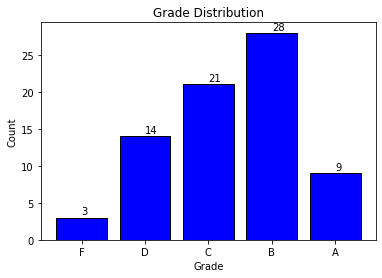

In [9]:
x_axis,y_axis = read_q2_data(hist_data_filename)
hist_plot(x_axis,y_axis)

## Analysis on Heuristic Methods.

In [10]:
barbox_data_filename = 'solution_data.csv'

In [11]:
def read_hist_data(filename):
    method = []
    ovf = []
    problem_id = []
    with open(filename,'r') as csvfile:
        a = csv.reader(csvfile)
        for rc in a:
            if not rc[0].startswith('%'):
                method.append((rc[1])) # converting string to float
                ovf.append(float(rc[2]))
                problem_id.append(float(rc[0]))
    return sorted(zip(problem_id, method, ovf)) 

In [12]:
# formula for gap
def formula(p,q):
    return (q-p)*100/q
def data_processing(barbox_data_filename):
    genetic =[]
    simu = []
    tabu = []
    counter = 1
    a,b,c,d = '','','',''
    data = read_hist_data(barbox_data_filename)
    for i,j,k in data: 
        if counter%4 == 1:
            a = k
        elif counter%4 == 2:
            b = k
        elif counter%4 == 3:
            c = k
        elif counter%4 == 0:
            d = k
            genetic.append(formula(a,b))
            simu.append(formula(c,b))
            tabu.append(formula(d,b))   
        counter+=1
    
    return [genetic, simu, tabu]

In [13]:
data = data_processing(barbox_data_filename)
barplot_data = [(sum(data[0]))/len(data[0]),(sum(data[1]))/len(data[1]),(sum(data[2]))/len(data[2])]

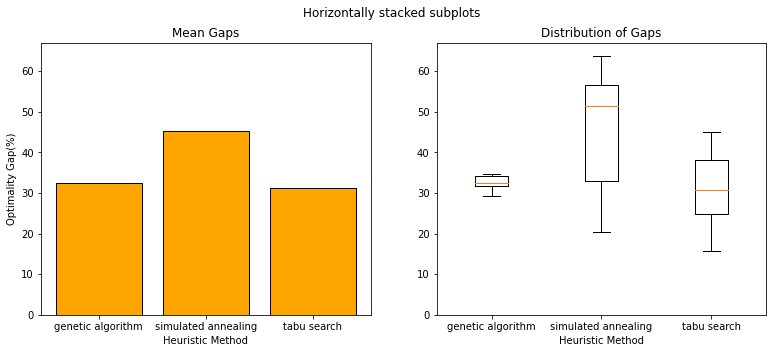

In [14]:
f,(ax1,ax2) = plt.subplots(1,2,sharey = 'all',figsize = (13,5))
f.suptitle('Horizontally stacked subplots')
ax1.set_title('Mean Gaps')
ax2.set_title('Distribution of Gaps')
ax1.set_xlabel('Heuristic Method')
ax1.set_ylabel('Optimality Gap(%)')
ax2.set_xlabel('Heuristic Method')
ax1.bar(list(range(0,3)),barplot_data,color='orange',edgecolor ='black',tick_label = ['genetic algorithm','simulated annealing','tabu search'])
ax2.boxplot(data)
plt.xticks([1, 2, 3],['genetic algorithm','simulated annealing','tabu search'])
ax2.tick_params(labelleft = True)